<a href="https://colab.research.google.com/github/anandsai410/Blockchain-technologies-Assignment-I/blob/main/(Latest)ORT_report_auto_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import datetime
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import punkt
import pandas as pd
import numpy as np
import re
from datetime import datetime, date, time
import time
from dateutil.parser import parser
from dateutil.relativedelta import relativedelta
parser=parser()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_excel("sn_customerservice_case (9).xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df

,Assigned to,Case,External Info,State,Priority,ORT manual,Next SLA due date,Next SLA reason,Tags
0,Anna Nemeth (I589988),An unknown error occurred during import. Plea...,2024-03-18 21:40:08 - Anna Nemeth (I589988) (E...,In progress,2 - High,2024-03-19 21:00:00,2024-03-19 21:00:00,ORT (SLA),IRT_METBY_POC
1,Japhet Eliel Marcos (I326525),Issue with the Benefits records forward propa...,2024-03-14 13:46:48 - Japhet Eliel Marcos (I32...,Awaiting Info,3 - Medium,2024-03-30 11:28:34,2024-03-30 11:28:34,ORT (SLA),"#PFA_90+_Bustathon_2023, #PFA_90+_Bustathon_20..."
2,Gabriel Dorneles da Silveira (I507454),Organisation not syncing from EC to Onboardin...,2024-03-19 01:48:58 - Gabriel Dorneles da Silv...,In progress,3 - Medium,2024-03-20 06:30:00,2024-03-20 06:30:00,ORT (SLA),NaN
3,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Compen...,2024-03-15 09:51:38 - Hemalatha S (I744459) (E...,In progress,2 - High,2024-03-21 23:39:34,2024-03-21 23:39:34,ORT (SLA),NaN
4,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Employ...,2024-03-15 06:28:33 - Hemalatha S (I744459) (E...,Awaiting Info,3 - Medium,2024-03-21 23:26:20,2024-03-21 23:26:20,ORT (SLA),NaN
...,...,...,...,...,...,...,...,...,...
453,Yilin Zhu (I567612),绩效表单接口退回错误​CS20240007226743,2024-03-19 15:11:03 - Zheng Wu (I584979) (Exte...,In progress,2 - High,2024-03-21 15:07:48,2024-03-21 15:07:48,ORT (SLA),NaN
454,Baige Liu (I320370),能否切换到离职岗位查看历史绩效表单​CS20240007216865,2024-03-15 19:50:26 - Baige Liu (I320370) (Ext...,In progress,2 - High,2024-03-19 19:51:04,2024-03-19 19:51:04,ORT (SLA),NaN
455,Jun Wang (I537420),表单章节权重无法保存​CS20240007264057,2024-03-15 14:27:14 - Jun Wang (I537420) (Exte...,In progress,3 - Medium,2024-03-22 14:26:38,2024-03-22 14:26:38,ORT (SLA),NaN
456,Yueyue Shi (I548077),評価テンプレートのセクション[社員情報]における表示オプションについて​CS20240007...,2024-03-19 14:24:38 - Huixian Cai (I528829) (E...,In progress,2 - High,2024-03-20 10:30:00,2024-03-20 10:30:00,ORT (SLA),NaN


For Finding ORT manual date sent by the system, The system follows a specific template and the index of the maual_ORT_date in the system's reply can be found from the string and once it is found, it is compared with the most recent ORT_manual date and if it matches, it is considered as a manual_ORT_OK case.

In [ ]:
ext_inf=df['External Info']
dte=df['ORT manual']
Userdf=pd.DataFrame()
df['OA_Ext_inf']=""
df['SE_Ext_inf']=""

In [ ]:
pattern1 = r'\<br/>(.*?)\<br/>'
pattern2 = r'\<p>(.*?)\</p>'

for i in range(0,len(df)):
  xstr=""
  ystr=""
  x = re.findall(pattern1, df.iloc[i,2])
  for j in x:
    xstr=xstr+". "+str(j)
  y = re.findall(pattern2, df.iloc[i,2])
  for j in y:
    ystr=ystr+". "+str(j)
  df.iloc[i,10]=str(ystr)
  df.iloc[i,9]=str(xstr)

In [ ]:
def convert_dte(x):
  if (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="/" and int(x[0:2])<=12 and int(x[3:5])>12:
    y=datetime.strptime(x, "%m/%d/%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="." and int(x[0:2])<=12 and int(x[3:5])>12:
    y=datetime.strptime(x, "%m.%d.%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="-" and int(x[0:2])<=12 and int(x[3:5])>12:
    y=datetime.strptime(x, "%m-%d-%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:4]+x[5:7]+x[8:10]).isdigit() and x[4]=="-":
    y=datetime.strptime(x, "%Y-%m-%d")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="-":
    y=datetime.strptime(x, "%d-%m-%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:4]+x[5:7]+x[8:10]).isdigit() and x[4]==".":
    y=datetime.strptime(x, "%Y.%m.%d")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]==".":
    y=datetime.strptime(x, "%d.%m.%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:4]+x[5:7]+x[8:10]).isdigit() and x[4]=="/":
    y=datetime.strptime(x, "%Y/%m/%d")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="/":
    y=datetime.strptime(x, "%d/%m/%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  else:
    return None

def repeat_check(a,b):
  a=parser.parse(a)
  b=parser.parse(b)
  if (a<b):
    return True
  else:
    return False


def check_dte(a=datetime(2000,1,1),b=datetime(9999,12,30)):
  try:
    a=parser.parse(str(a))
    b=parser.parse(str(b))
    if a==b:
      return True
    else:
      return False
  except:
    return False

def is_date(string):
  if ((string[0:4]+string[5:7]+string[8:10]).isdigit()) or ((string[0:2]+string[3:5]+string[6:10]).isdigit()):
    return True
  else:
    return False

In [ ]:
OA_ext_inf=df['OA_Ext_inf']
dte=df['ORT manual']
countok=0
rcount=0

for i in range(0, (len(df) - 1)):
    OA_ext_check = word_tokenize(str(OA_ext_inf[i]))
    dte_check = word_tokenize(str(dte[i]))
    for j in OA_ext_check:
      if 4 <= len(j) <= 11:
        if is_date(j):
          if (j[0:2] + j[3:5] + j[6:10]).isdigit() and len(j) > 9:
            j = convert_dte(j)
            if check_dte(str(j), str(dte_check[0])):
              countok = countok + 1
              continue
            elif repeat_check(str(j), str(dte_check[0])):  # j!=curr_y:
              rcount = rcount + 1
              continue

print(countok)

45


In [ ]:
df

,Assigned to,Case,External Info,State,Priority,ORT manual,Next SLA due date,Next SLA reason,Tags,OA_Ext_inf,SE_Ext_inf,ORT_Assistant
0,Anna Nemeth (I589988),An unknown error occurred during import. Plea...,2024-03-18 21:40:08 - Anna Nemeth (I589988) (E...,In progress,2 - High,2024-03-19 21:00:00,2024-03-19 21:00:00,ORT (SLA),IRT_METBY_POC,. You will receive an update about this incide...,". <cite style=""margin: 0in; margin-left: .375i...",
1,Japhet Eliel Marcos (I326525),Issue with the Benefits records forward propa...,2024-03-14 13:46:48 - Japhet Eliel Marcos (I32...,Awaiting Info,3 - Medium,2024-03-30 11:28:34,2024-03-30 11:28:34,ORT (SLA),"#PFA_90+_Bustathon_2023, #PFA_90+_Bustathon_20...",,". Dear Team,. We have reengaged Engineering re...",
2,Gabriel Dorneles da Silveira (I507454),Organisation not syncing from EC to Onboardin...,2024-03-19 01:48:58 - Gabriel Dorneles da Silv...,In progress,3 - Medium,2024-03-20 06:30:00,2024-03-20 06:30:00,ORT (SLA),NaN,. You will receive an update about this incide...,". Hi Apurba,. We are following up on our earli...",
3,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Compen...,2024-03-15 09:51:38 - Hemalatha S (I744459) (E...,In progress,2 - High,2024-03-21 23:39:34,2024-03-21 23:39:34,ORT (SLA),NaN,,". Hello Team,<br /><br />We informed the engin...",
4,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Employ...,2024-03-15 06:28:33 - Hemalatha S (I744459) (E...,Awaiting Info,3 - Medium,2024-03-21 23:26:20,2024-03-21 23:26:20,ORT (SLA),NaN,,". Hello Team,<br /><br />We requested our engi...",
...,...,...,...,...,...,...,...,...,...,...,...,...
453,Yilin Zhu (I567612),绩效表单接口退回错误​CS20240007226743,2024-03-19 15:11:03 - Zheng Wu (I584979) (Exte...,In progress,2 - High,2024-03-21 15:07:48,2024-03-21 15:07:48,ORT (SLA),NaN,. . Contact phone or email: cachen@deloitte.co...,. 尊敬的客户：<br /><br />您好。<br />已收到您提供的信息，正在为您查看，...,
454,Baige Liu (I320370),能否切换到离职岗位查看历史绩效表单​CS20240007216865,2024-03-15 19:50:26 - Baige Liu (I320370) (Ext...,In progress,2 - High,2024-03-19 19:51:04,2024-03-19 19:51:04,ORT (SLA),NaN,,". Hi Lynn,&nbsp;. 您好。我了解了。进一步测试后，将反馈结论。. Regar...",
455,Jun Wang (I537420),表单章节权重无法保存​CS20240007264057,2024-03-15 14:27:14 - Jun Wang (I537420) (Exte...,In progress,3 - Medium,2024-03-22 14:26:38,2024-03-22 14:26:38,ORT (SLA),NaN,,. 尊敬的用户：. 您好！. 感谢您联系Cloud Product Support.. 为了...,
456,Yueyue Shi (I548077),評価テンプレートのセクション[社員情報]における表示オプションについて​CS20240007...,2024-03-19 14:24:38 - Huixian Cai (I528829) (E...,In progress,2 - High,2024-03-20 10:30:00,2024-03-20 10:30:00,ORT (SLA),NaN,,,


In [ ]:
df['ORT_Assistant']=""
df

,Assigned to,Case,External Info,State,Priority,ORT manual,Next SLA due date,Next SLA reason,Tags,OA_Ext_inf,SE_Ext_inf,ORT_Assistant
0,Anna Nemeth (I589988),An unknown error occurred during import. Plea...,2024-03-18 21:40:08 - Anna Nemeth (I589988) (E...,In progress,2 - High,2024-03-19 21:00:00,2024-03-19 21:00:00,ORT (SLA),IRT_METBY_POC,. You will receive an update about this incide...,". <cite style=""margin: 0in; margin-left: .375i...",
1,Japhet Eliel Marcos (I326525),Issue with the Benefits records forward propa...,2024-03-14 13:46:48 - Japhet Eliel Marcos (I32...,Awaiting Info,3 - Medium,2024-03-30 11:28:34,2024-03-30 11:28:34,ORT (SLA),"#PFA_90+_Bustathon_2023, #PFA_90+_Bustathon_20...",,". Dear Team,. We have reengaged Engineering re...",
2,Gabriel Dorneles da Silveira (I507454),Organisation not syncing from EC to Onboardin...,2024-03-19 01:48:58 - Gabriel Dorneles da Silv...,In progress,3 - Medium,2024-03-20 06:30:00,2024-03-20 06:30:00,ORT (SLA),NaN,. You will receive an update about this incide...,". Hi Apurba,. We are following up on our earli...",
3,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Compen...,2024-03-15 09:51:38 - Hemalatha S (I744459) (E...,In progress,2 - High,2024-03-21 23:39:34,2024-03-21 23:39:34,ORT (SLA),NaN,,". Hello Team,<br /><br />We informed the engin...",
4,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Employ...,2024-03-15 06:28:33 - Hemalatha S (I744459) (E...,Awaiting Info,3 - Medium,2024-03-21 23:26:20,2024-03-21 23:26:20,ORT (SLA),NaN,,". Hello Team,<br /><br />We requested our engi...",
...,...,...,...,...,...,...,...,...,...,...,...,...
453,Yilin Zhu (I567612),绩效表单接口退回错误​CS20240007226743,2024-03-19 15:11:03 - Zheng Wu (I584979) (Exte...,In progress,2 - High,2024-03-21 15:07:48,2024-03-21 15:07:48,ORT (SLA),NaN,. . Contact phone or email: cachen@deloitte.co...,. 尊敬的客户：<br /><br />您好。<br />已收到您提供的信息，正在为您查看，...,
454,Baige Liu (I320370),能否切换到离职岗位查看历史绩效表单​CS20240007216865,2024-03-15 19:50:26 - Baige Liu (I320370) (Ext...,In progress,2 - High,2024-03-19 19:51:04,2024-03-19 19:51:04,ORT (SLA),NaN,,". Hi Lynn,&nbsp;. 您好。我了解了。进一步测试后，将反馈结论。. Regar...",
455,Jun Wang (I537420),表单章节权重无法保存​CS20240007264057,2024-03-15 14:27:14 - Jun Wang (I537420) (Exte...,In progress,3 - Medium,2024-03-22 14:26:38,2024-03-22 14:26:38,ORT (SLA),NaN,,. 尊敬的用户：. 您好！. 感谢您联系Cloud Product Support.. 为了...,
456,Yueyue Shi (I548077),評価テンプレートのセクション[社員情報]における表示オプションについて​CS20240007...,2024-03-19 14:24:38 - Huixian Cai (I528829) (E...,In progress,2 - High,2024-03-20 10:30:00,2024-03-20 10:30:00,ORT (SLA),NaN,,,


In [ ]:
countok=0
OA_ext_inf=df['OA_Ext_inf']
dte=df['ORT manual']
def extract_text_between_delimiters(text, start_delim, end_delim):
    start_index = text.find(start_delim)
    if start_index == -1:
        return None  # Start delimiter not found

    start_index += len(start_delim)
    end_index = text.find(end_delim, start_index)
    if end_index == -1:
        return None  # End delimiter not found

    return text[start_index:end_index]

for i in range(0,len(df)-1):
  OA_ext_check = word_tokenize(str(OA_ext_inf[i]))
  dte_check = word_tokenize(str(dte[i]))
  Omdte=extract_text_between_delimiters(df.iloc[i,9],'on','before')
  if Omdte==None:
    Omdte="ORT_M_NOK"
    df.iloc[i,11]=Omdte
  else:
    df.iloc[i,11]=Omdte
  #else:
    #df.iloc[i,11]="ORTA_M_NOK"


print(countok)

0


In [ ]:
df

,Assigned to,Case,External Info,State,Priority,ORT manual,Next SLA due date,Next SLA reason,Tags,OA_Ext_inf,SE_Ext_inf,ORT_Assistant
0,Anna Nemeth (I589988),An unknown error occurred during import. Plea...,2024-03-18 21:40:08 - Anna Nemeth (I589988) (E...,In progress,2 - High,2024-03-19 21:00:00,2024-03-19 21:00:00,ORT (SLA),IRT_METBY_POC,. You will receive an update about this incide...,". <cite style=""margin: 0in; margin-left: .375i...",19.03.2024
1,Japhet Eliel Marcos (I326525),Issue with the Benefits records forward propa...,2024-03-14 13:46:48 - Japhet Eliel Marcos (I32...,Awaiting Info,3 - Medium,2024-03-30 11:28:34,2024-03-30 11:28:34,ORT (SLA),"#PFA_90+_Bustathon_2023, #PFA_90+_Bustathon_20...",,". Dear Team,. We have reengaged Engineering re...",ORT_M_NOK
2,Gabriel Dorneles da Silveira (I507454),Organisation not syncing from EC to Onboardin...,2024-03-19 01:48:58 - Gabriel Dorneles da Silv...,In progress,3 - Medium,2024-03-20 06:30:00,2024-03-20 06:30:00,ORT (SLA),NaN,. You will receive an update about this incide...,". Hi Apurba,. We are following up on our earli...",19.03.2024
3,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Compen...,2024-03-15 09:51:38 - Hemalatha S (I744459) (E...,In progress,2 - High,2024-03-21 23:39:34,2024-03-21 23:39:34,ORT (SLA),NaN,,". Hello Team,<br /><br />We informed the engin...",ORT_M_NOK
4,Hemalatha S (I744459),132746 - Purge Audit Data via. Scripts (Employ...,2024-03-15 06:28:33 - Hemalatha S (I744459) (E...,Awaiting Info,3 - Medium,2024-03-21 23:26:20,2024-03-21 23:26:20,ORT (SLA),NaN,,". Hello Team,<br /><br />We requested our engi...",ORT_M_NOK
...,...,...,...,...,...,...,...,...,...,...,...,...
453,Yilin Zhu (I567612),绩效表单接口退回错误​CS20240007226743,2024-03-19 15:11:03 - Zheng Wu (I584979) (Exte...,In progress,2 - High,2024-03-21 15:07:48,2024-03-21 15:07:48,ORT (SLA),NaN,. . Contact phone or email: cachen@deloitte.co...,. 尊敬的客户：<br /><br />您好。<br />已收到您提供的信息，正在为您查看，...,ORT_M_NOK
454,Baige Liu (I320370),能否切换到离职岗位查看历史绩效表单​CS20240007216865,2024-03-15 19:50:26 - Baige Liu (I320370) (Ext...,In progress,2 - High,2024-03-19 19:51:04,2024-03-19 19:51:04,ORT (SLA),NaN,,". Hi Lynn,&nbsp;. 您好。我了解了。进一步测试后，将反馈结论。. Regar...",ORT_M_NOK
455,Jun Wang (I537420),表单章节权重无法保存​CS20240007264057,2024-03-15 14:27:14 - Jun Wang (I537420) (Exte...,In progress,3 - Medium,2024-03-22 14:26:38,2024-03-22 14:26:38,ORT (SLA),NaN,,. 尊敬的用户：. 您好！. 感谢您联系Cloud Product Support.. 为了...,ORT_M_NOK
456,Yueyue Shi (I548077),評価テンプレートのセクション[社員情報]における表示オプションについて​CS20240007...,2024-03-19 14:24:38 - Huixian Cai (I528829) (E...,In progress,2 - High,2024-03-20 10:30:00,2024-03-20 10:30:00,ORT (SLA),NaN,,,ORT_M_NOK


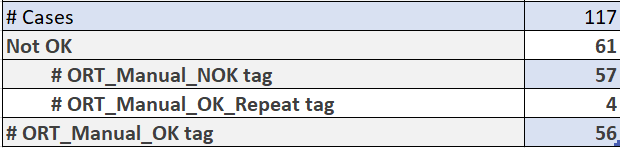

In [ ]:
import openpyxl

pdf=pd.DataFrame()
pdf['Case']=df['Case']
pdf["State"]=df["State"]
pdf["Priority"]=df["Priority"]
#pdf['Ext_inf']=df['External Info']
pdf['OM']=df['ORT manual']
#pdf['SE_EF']=df['SE_Ext_inf']
#pdf['OA_EF']=df['OA_Ext_inf']
pdf['ORT_Assistant_OK']=df['ORT_Assistant']
pdf['Assigned_to']=df['Assigned to']
pdf['Tags']=df["Tags"]
pdf

pdf.to_excel('Global.xlsx', sheet_name='ORT_Assistant_Cases')

In [ ]:
df

,Case,External Info,ORT manual,Updated by,Customer contact,Company,Source channel Task,State,Priority,Assigned to,Updated,Tags,CP_ext_inf,OA_ext_inf,ORT_Assistant
0,API user restriction​CS20230006607972,2023-12-20 12:09:32 - Rohit Panwar (I322661) (...,2023-12-20 15:00:35,I322661,Anitha Ponna (S0025152086),NaN,Chat,Resolved,3 - Medium,Rohit Panwar (I322661),2023-12-20 12:09:32,$ORT_Manual_OK,". Dear Anitha,. Thank you for your response. T...",. You will receive an update about this incide...,ORTM_OK
1,Users not imported from SF into LMS​CS20230006...,2023-12-15 04:12:16 - System (External Info)\n...,2023-12-15 15:00:31,I322661,Dominic Ponnuswamy (S0024832552),NaN,Portal,Closed,2 - High,Rohit Panwar (I322661),2023-12-18 10:35:06,"$ORT_Manual_OK, @Not_Release, IRT_METBY_QG",". Dear Dominic,. I have looked into the integr...",. You will receive an update about this incide...,ORTM_OK
2,WFA shows no pending reqs but there are pendin...,2023-12-27 05:18:08 - System (External Info)\n...,2023-12-06 20:41:39,I501666,Mandy Birk (S0016457108),NaN,Portal,Closed,2 - High,Subba Reddy Venkata Takkoli (I501666),2024-01-01 07:01:32,"$ORT_Manual_NOK, IRT_METBY_POC",". Hi Mandy,. As requested plesae provide the d...",. You will receive an update about this incide...,ORTM_NOK
3,Can't activate Onboarding 2.0 in the Productio...,2023-12-01 08:26:46 - Subba Reddy Venkata Takk...,2023-12-13 02:35:21,I501666,Alfonso Adeva (S0024115440),NaN,Portal,Closed,2 - High,Subba Reddy Venkata Takkoli (I501666),2023-12-05 11:58:27,$ORT_Manual_NOK,". Hi Customer,. Corrected config related to er...",,ORTM_NOK
4,Not able to add input control for background e...,2024-01-01 07:04:12 - Subba Reddy Venkata Takk...,2023-12-31 18:06:09,I501666,Aji Hussain (S0021762292),NaN,Portal,Resolved,2 - High,Subba Reddy Venkata Takkoli (I501666),2024-01-01 07:04:12,$ORT_Manual_NOK,. Solution provided:[code]. As of now closing ...,,ORTM_NOK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Received an error when importing a story​CS202...,2023-12-18 10:31:14 - Subba Reddy Venkata Takk...,2023-12-21 20:30:00,system,Kumi Mikami (S0024714497),NaN,Portal,Closed,2 - High,Subba Reddy Venkata Takkoli (I501666),2023-12-28 08:52:48,$ORT_Manual_NOK,". Thanks for the patience Kumi,. Engineering t...",. . Channel: Call from customer. Interaction s...,ORTM_NOK
113,"Everytime I try to run a story report, the err...",2024-01-09 05:51:25 - System (External Info)\n...,2023-12-19 20:58:38,system,Park Sujeong (S0024711903),NaN,Portal,Closed,2 - High,Subba Reddy Venkata Takkoli (I501666),2024-01-09 05:51:25,$ORT_Manual_NOK,". Hi,. I am available for call in any feasible...",. You will receive an update about this incide...,ORTM_NOK
114,ORD Report Error​CS20230006745117,2023-12-21 20:47:58 - Subba Reddy Venkata Takk...,2023-12-22 13:33:58,system,Jianliang Yin (S0019691286),NaN,Portal,Resolved,2 - High,Subba Reddy Venkata Takkoli (I501666),2023-12-30 09:34:40,$ORT_Manual_NOK,". Thanks, as of now closing the case. Looks li...",,ORTM_NOK
115,An error occurred while importing a Story repo...,2023-12-28 06:03:25 - Subba Reddy Venkata Takk...,2023-12-31 12:54:39,system,Napapatch Rakwong (S0025555256),NaN,Portal,Resolved,2 - High,Subba Reddy Venkata Takkoli (I501666),2023-12-29 08:57:03,$ORT_Manual_NOK,. Solution provided:[code]. &nbsp;. Issue is f...,,ORTM_NOK
